<a href="https://colab.research.google.com/github/maskot1977/tmd2020/blob/main/hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 予測したい現象を表す関数

In [ ]:
import numpy as np
f_latent = lambda x: 1/(1 + np.exp(-x)) # ノイズなし
f = lambda x: f_latent(x) + 0.05 * np.sin(np.pi * x + 0.5) # ノイズ入り

In [ ]:
X = np.linspace(-10, 10, 40)
Y = f(X)

X = np.array(X).reshape(len(X), 1)
Y = np.reshape(Y,(-1))

x_latent = np.linspace(-20, 20, 400)
y_latent = f_latent(x_latent)

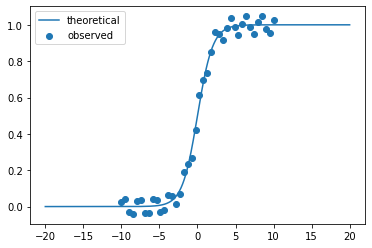

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, Y, label="observed")
plt.plot(x_latent, y_latent, label="theoretical")
plt.legend()
plt.show()

# SVR （サポートベクター回帰）のデフォルト

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), SVR())
model.fit(X, Y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

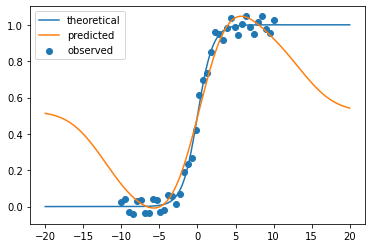

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_latent, y_latent, label="theoretical")
plt.scatter(X, Y, label="observed")
plt.plot(
    x_latent,
    model.predict(x_latent.reshape(-1, 1)),
    label="predicted"
)
plt.legend()
plt.show()

# SVRのハイパーパラメーター

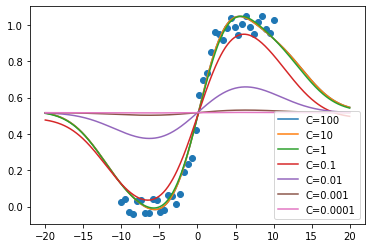

In [ ]:
plt.scatter(X, Y)
for c in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    model = make_pipeline(StandardScaler(), SVR(C=c))
    model.fit(X, Y)
    y_predict = model.predict(x_latent.reshape(len(x_latent), 1))
    plt.plot(x_latent, y_predict, label="C=" + str(c))
plt.legend()
plt.show()

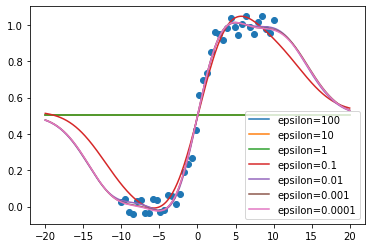

In [ ]:
plt.scatter(X, Y)
for e in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    model = make_pipeline(StandardScaler(), SVR(epsilon=e))
    model.fit(X, Y)
    y_predict = model.predict(x_latent.reshape(len(x_latent), 1))
    plt.plot(x_latent, y_predict, label="epsilon=" + str(e))
plt.legend()
plt.show()

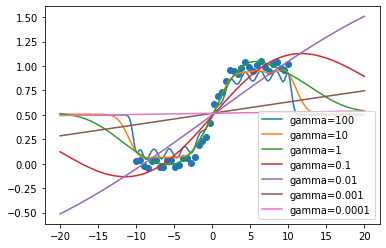

In [ ]:
plt.scatter(X, Y)
for g in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    model = make_pipeline(StandardScaler(), SVR(gamma=g))
    model.fit(X, Y)
    y_predict = model.predict(x_latent.reshape(len(x_latent), 1))
    plt.plot(x_latent, y_predict, label="gamma=" + str(g))
plt.legend()
plt.show()

# グリッドサーチ

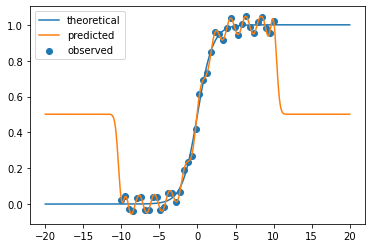

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.0001,
                     gamma=100, kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
best_score = 0
best_model = False
for c in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    for e in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
        for g in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
            model = make_pipeline(
                StandardScaler(), 
                SVR(C=c, epsilon=e, gamma=g)
                )
            model.fit(X, Y)
            score = model.score(X, Y)
            if best_score < score:
                best_score = score
                best_model = model

y_predict = best_model.predict(x_latent.reshape(len(x_latent), 1))
plt.scatter(X, Y, label="observed")
plt.plot(x_latent, y_latent, label="theoretical")
plt.plot(x_latent, y_predict, label="predicted")
plt.legend()
plt.show()
best_model

# クロスバリデーション（交差検証）

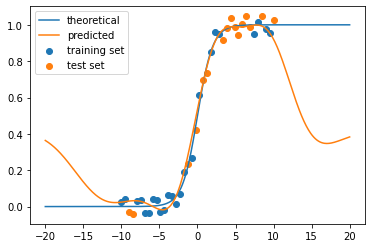

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.0001,
                     gamma=1, kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

best_score = 0
best_model = False
for c in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    for e in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
        for g in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
            model = make_pipeline(
                StandardScaler(), 
                SVR(C=c, epsilon=e, gamma=g)
                )
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            if best_score < score:
                best_score = score
                best_model = model

y_predict = best_model.predict(x_latent.reshape(len(x_latent), 1))
plt.scatter(X_train, y_train, label="training set")
plt.scatter(X_test, y_test, label="test set")
plt.plot(x_latent, y_latent, label="theoretical")
plt.plot(x_latent, y_predict, label="predicted")
plt.legend()
plt.show()
best_model

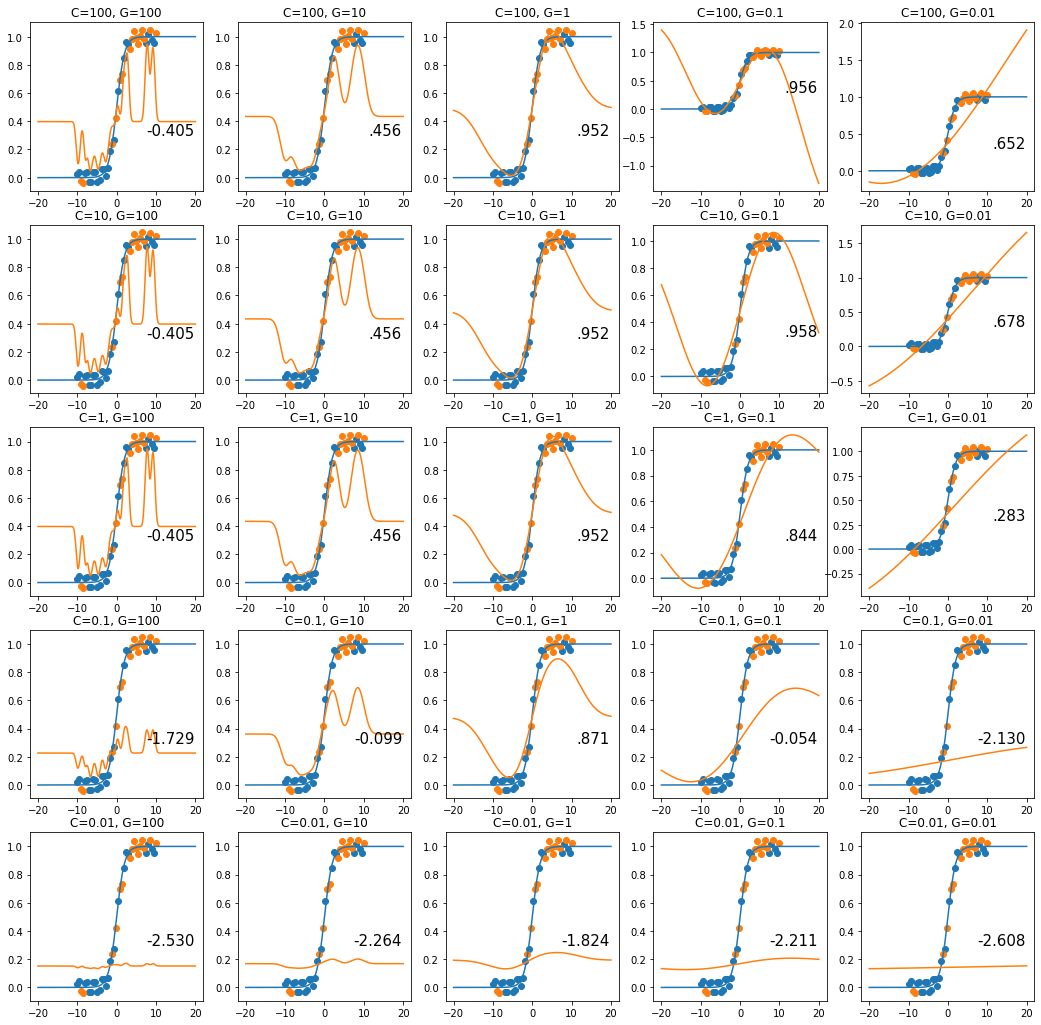

In [ ]:
figure = plt.figure(figsize=(18, 18))
C = [100, 10, 1, 0.1, 0.01]
G = [100, 10, 1, 0.1, 0.01]
i = 0
for c in C:
    for g in G:
        i += 1
        ax = plt.subplot(len(C), len(G), i)
        model = make_pipeline(StandardScaler(), SVR(C=c, gamma=g))
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        ax.set_title("C=" + str(c) + ", G=" + str(g))
        y_predict = model.predict(x_latent.reshape(len(x_latent), 1))
        ax.scatter(X_train, y_train, label="training set")
        ax.scatter(X_test, y_test, label="test set")
        ax.plot(x_latent, y_latent, label="theoretical")
        ax.plot(x_latent, y_predict, label="predicted")
        ax.text(
                x_latent.max() - 0.3,
                y_latent.min() + 0.3,
                ("%.3f" % score).lstrip("0"),
                size=15,
                horizontalalignment="right",
            )

plt.show()

# Optunaを用いた最適化

## Optunaインストール

In [ ]:
!pip install optuna

     |████████████████████████████████| 266kB 5.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 163kB 7.8MB/s 
     |████████████████████████████████| 81kB 6.0MB/s 
     |████████████████████████████████| 81kB 6.1MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 112kB 9.4MB/s 
     |████████████████████████████████| 133kB 8.7MB/s 
  Created wheel for optuna: filename=optuna-2.3.0-cp36-none-any.whl size=359761 sha256=a4801983aac4c97f6282c29b17a5e5d78b58f45e585f99de791dcfb0ec9bb89d
  Stored in directory: /root/.cache/pip/wheels/fa/91/19/64b0ec6b964f89c0695a9dc6db6f851d0b54c5381a5c9cadfb
Successfully built optuna
  Created wheel for PrettyTable: filename=prettytable-0.7.2-cp36-none-any.whl size=13700 sha256=c82ab08a6bae5cbf28d3bcbe6fc9eadd738280619e3b0de47e60208f989fc538
  Stored in directory: /root/.cache/pip/wheels

## 目的関数の作成

In [ ]:
def objective(trial):
    c = trial.suggest_loguniform('C', 0.00001, 1000)
    e = trial.suggest_loguniform('epsilon', 0.00001, 1000)
    g = trial.suggest_loguniform('gamma', 0.00001, 1000)
    model = make_pipeline(
        StandardScaler(), 
        SVR(C=c, epsilon=e, gamma=g)
    )
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

## 実行

In [ ]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARN)
study = optuna.create_study(direction='maximize')

In [ ]:
study.optimize(objective, n_trials=1000, show_progress_bar=True)

/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



In [ ]:
study.best_value

0.9863477904630847

In [ ]:
study.best_params

{'C': 30.250859328705424,
 'epsilon': 0.030619442027834218,
 'gamma': 1.0081412045817668}

## 学習履歴

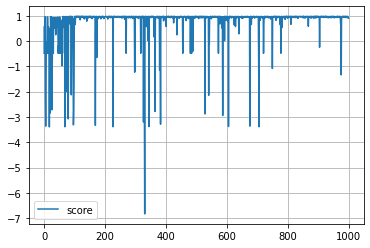

In [ ]:
plt.plot([trial.value for trial in study.trials], label='score')
plt.grid()
plt.legend()
plt.show()

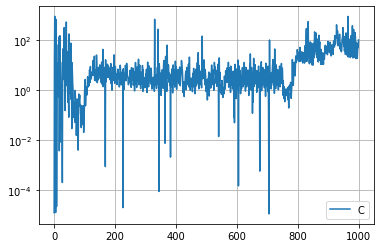

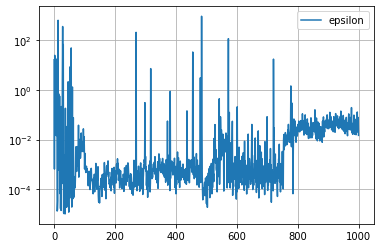

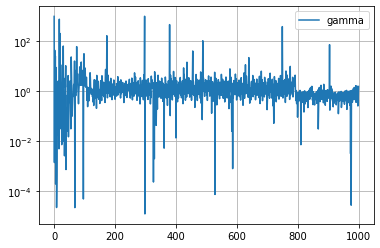

In [ ]:
for key in study.trials[0].params.keys():
    plt.plot([trial.params[key] for trial in study.trials], label=key)
    plt.grid()
    plt.yscale('log')
    plt.legend()
    plt.show()

## ベストパラメーターを持つモデルで再学習

In [ ]:
best_model = make_pipeline(
        StandardScaler(), 
        SVR(**study.best_params)
    )
best_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=30.250859328705424, cache_size=200, coef0=0.0, degree=3,
                     epsilon=0.030619442027834218, gamma=1.0081412045817668,
                     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

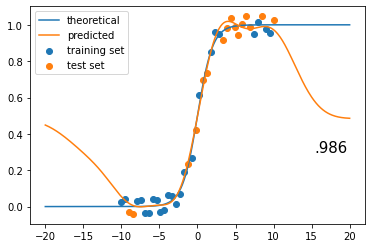

In [ ]:
y_predict = best_model.predict(x_latent.reshape(len(x_latent), 1))
score = best_model.score(X_test, y_test)
plt.scatter(X_train, y_train, label="training set")
plt.scatter(X_test, y_test, label="test set")
plt.plot(x_latent, y_latent, label="theoretical")
plt.plot(x_latent, y_predict, label="predicted")
plt.legend()
plt.text(
    x_latent.max() - 0.3, 
    y_latent.min() + 0.3,
    ("%.3f" % score).lstrip("0"),
    size=15,
    horizontalalignment="right",
    )
plt.show()

# ランダムフォレスト回帰

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), RandomForestRegressor())
model.fit(X, Y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

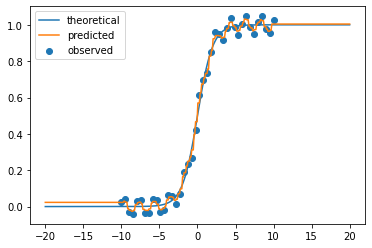

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_latent, y_latent, label="theoretical")
plt.scatter(X, Y, label="observed")
plt.plot(
    x_latent,
    model.predict(x_latent.reshape(-1, 1)),
    label="predicted"
)
plt.legend()
plt.show()

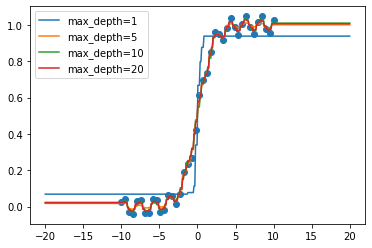

In [ ]:
plt.scatter(X, Y)
for d in [1, 5, 10, 20]:
    model = make_pipeline(
        StandardScaler(), 
        RandomForestRegressor(max_depth=d))
    model.fit(X, Y)
    y_predict = model.predict(x_latent.reshape(len(x_latent), 1))
    plt.plot(x_latent, y_predict, label="max_depth=" + str(d))
plt.legend()
plt.show()

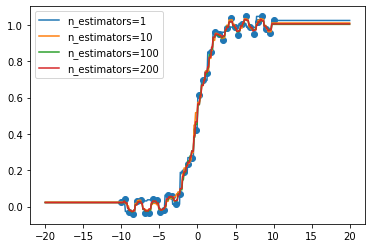

In [ ]:
plt.scatter(X, Y)
for e in [1, 10, 100, 200]:
    model = make_pipeline(
        StandardScaler(), 
        RandomForestRegressor(n_estimators=e))
    model.fit(X, Y)
    y_predict = model.predict(x_latent.reshape(len(x_latent), 1))
    plt.plot(x_latent, y_predict, label="n_estimators=" + str(e))
plt.legend()
plt.show()

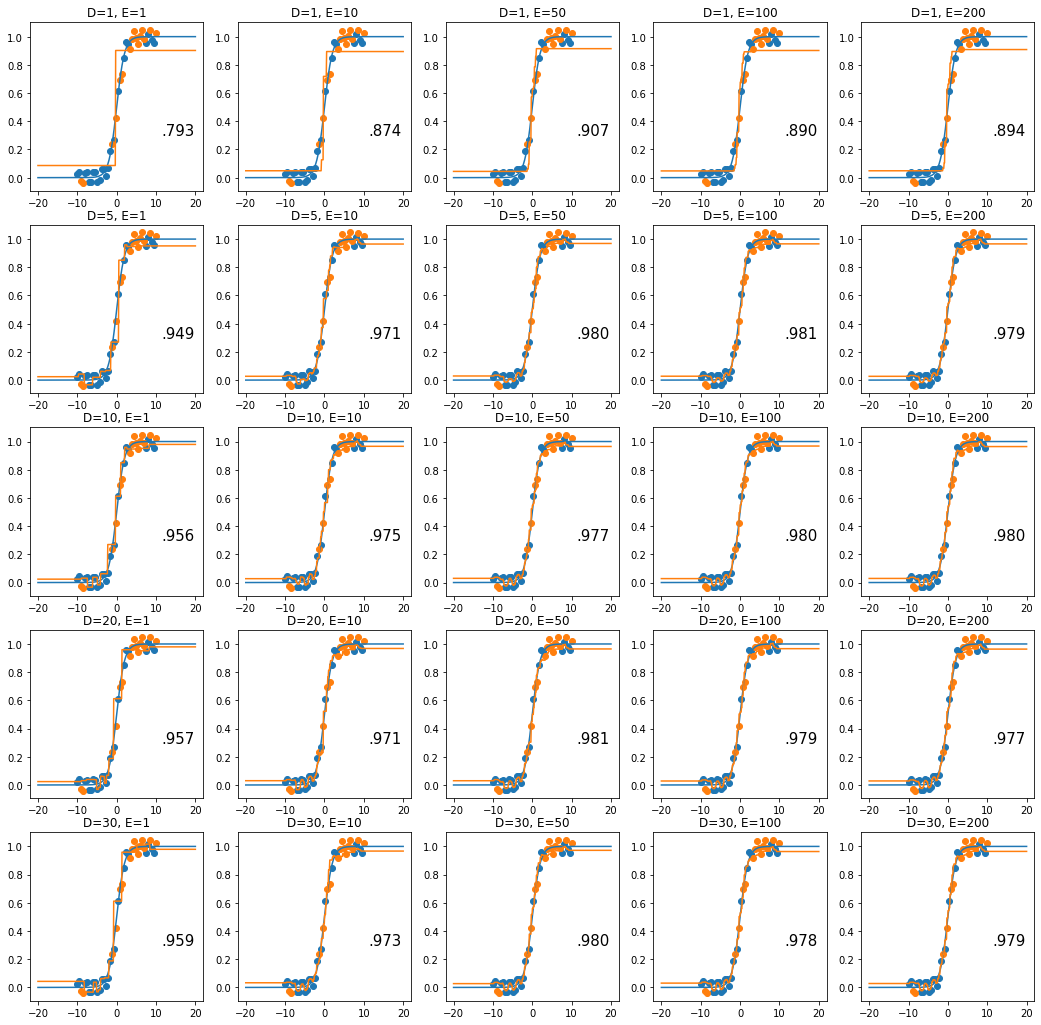

In [ ]:
figure = plt.figure(figsize=(18, 18))
D = [1, 5, 10, 20, 30]
E = [1, 10, 50, 100, 200]
i = 0
for d in D:
    for e in E:
        i += 1
        ax = plt.subplot(len(D), len(E), i)
        model = make_pipeline(
            StandardScaler(), 
            RandomForestRegressor(max_depth=d, n_estimators=e))
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        ax.set_title("D=" + str(d) + ", E=" + str(e))
        y_predict = model.predict(x_latent.reshape(len(x_latent), 1))
        ax.scatter(X_train, y_train, label="training set")
        ax.scatter(X_test, y_test, label="test set")
        ax.plot(x_latent, y_latent, label="theoretical")
        ax.plot(x_latent, y_predict, label="predicted")
        ax.text(
                x_latent.max() - 0.3,
                y_latent.min() + 0.3,
                ("%.3f" % score).lstrip("0"),
                size=15,
                horizontalalignment="right",
            )

plt.show()

In [ ]:
def objective(trial):
    c = trial.suggest_categorical("criterion", ["mse", "mae"])
    e = trial.suggest_int('n_estimators', 10, 100)
    d = trial.suggest_int('max_depth', 1, 30)
    model = make_pipeline(
        StandardScaler(), 
        RandomForestRegressor(
            random_state=1,
            criterion=c,
            max_depth=d,
            n_estimators=e, 
            )
    )
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARN)
study = optuna.create_study(direction='maximize')

In [ ]:
study.optimize(objective, n_trials=1000, show_progress_bar=True)

/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



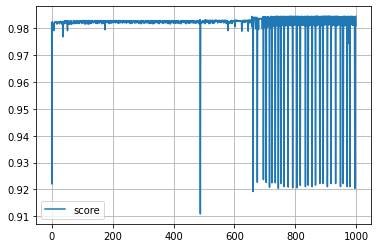

In [ ]:
plt.plot([trial.value for trial in study.trials], label='score')
plt.grid()
plt.legend()
plt.show()

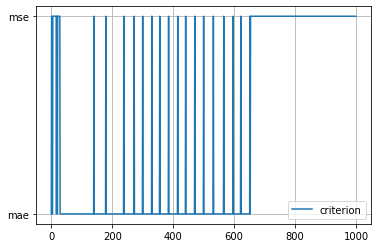

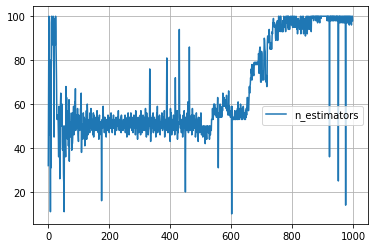

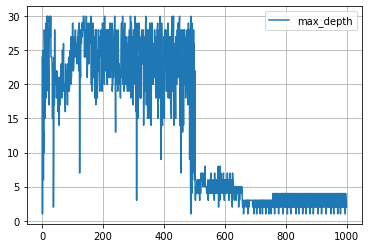

In [ ]:
for key in study.trials[0].params.keys():
    plt.plot([trial.params[key] for trial in study.trials], label=key)
    plt.grid()
    plt.legend()
    plt.show()

In [ ]:
best_model = make_pipeline(
        StandardScaler(), 
        RandomForestRegressor(
            random_state=1,
            **study.best_params,
        )
    )
best_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=3,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=1,
                                       verbose=0, warm_start=False))],
         verbose=False)

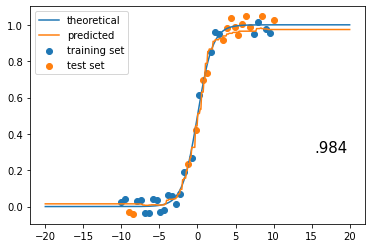

In [ ]:
y_predict = best_model.predict(x_latent.reshape(len(x_latent), 1))
score = best_model.score(X_test, y_test)
plt.scatter(X_train, y_train, label="training set")
plt.scatter(X_test, y_test, label="test set")
plt.plot(x_latent, y_latent, label="theoretical")
plt.plot(x_latent, y_predict, label="predicted")
plt.legend()
plt.text(
    x_latent.max() - 0.3, 
    y_latent.min() + 0.3,
    ("%.3f" % score).lstrip("0"),
    size=15,
    horizontalalignment="right",
    )
plt.show()

# MLP

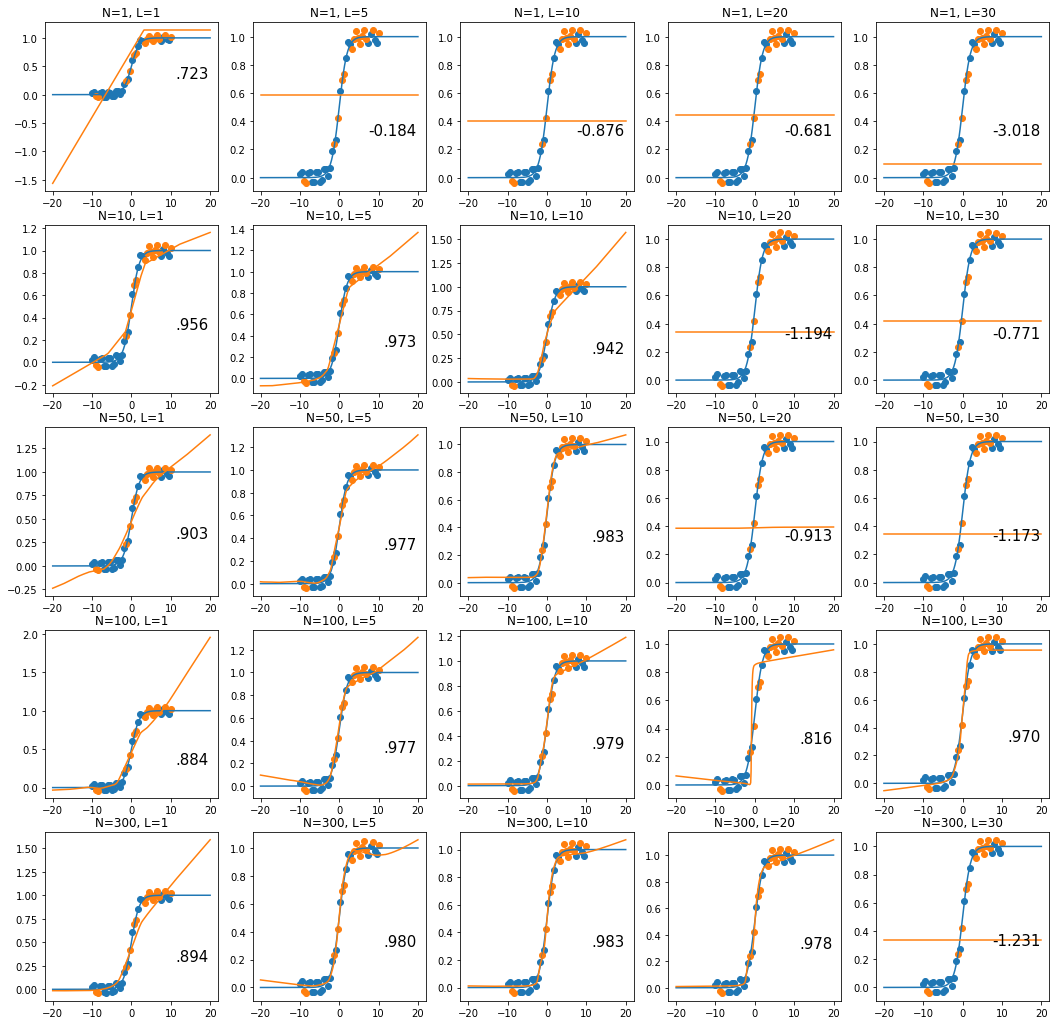

In [ ]:
from sklearn.neural_network import MLPRegressor

figure = plt.figure(figsize=(18, 18))
N = [1, 10, 50, 100, 300]
L = [1, 5, 10, 20, 30]
i = 0
for n in N:
    for l in L:
        i += 1
        ax = plt.subplot(len(N), len(L), i)
        model = make_pipeline(
            StandardScaler(), 
            MLPRegressor(max_iter=2000, hidden_layer_sizes=tuple([n for _ in range(l)])))
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        ax.set_title("N=" + str(n) + ", L=" + str(l))
        y_predict = model.predict(x_latent.reshape(len(x_latent), 1))
        ax.scatter(X_train, y_train, label="training set")
        ax.scatter(X_test, y_test, label="test set")
        ax.plot(x_latent, y_latent, label="theoretical")
        ax.plot(x_latent, y_predict, label="predicted")
        ax.text(
                x_latent.max() - 0.3,
                y_latent.min() + 0.3,
                ("%.3f" % score).lstrip("0"),
                size=15,
                horizontalalignment="right",
            )

plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor
def objective(trial):
    layers = []
    n_layers = trial.suggest_int('n_layers', 1, 20)
    for i in range(n_layers):
        layers.append(trial.suggest_int(str(i), 10, 100))
    learning_rate_init, = trial.suggest_loguniform('learning_rate_init', 0.001, 0.1),
    model = make_pipeline(
        StandardScaler(), 
        MLPRegressor(
            random_state=1,
            max_iter=2000, early_stopping=True,
            hidden_layer_sizes=tuple(layers),
            learning_rate_init=learning_rate_init,
            )
    )

    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARN)
study = optuna.create_study(direction='maximize')

In [ ]:
study.optimize(objective, n_trials=1000, show_progress_bar=True)

/usr/local/lib/python3.6/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



In [ ]:
study.best_params

{'0': 17, '1': 76, 'learning_rate_init': 0.011847664163078003, 'n_layers': 2}

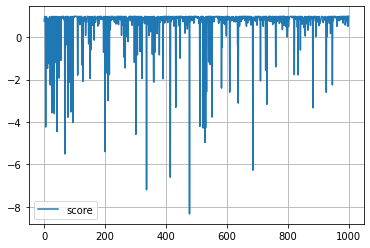

In [ ]:
plt.plot([trial.value for trial in study.trials], label='score')
plt.grid()
plt.legend()
plt.show()

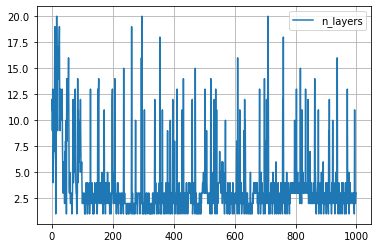

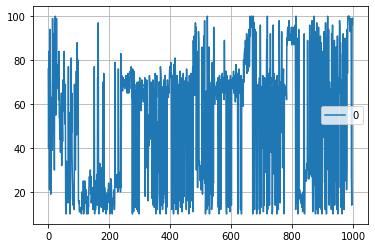

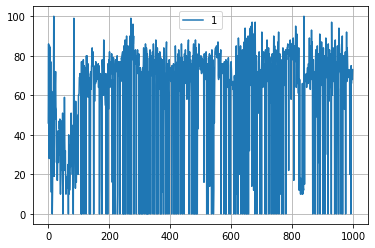

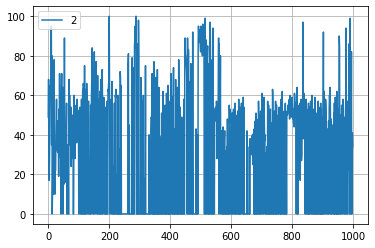

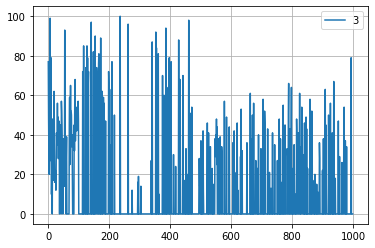

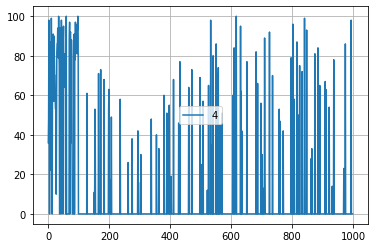

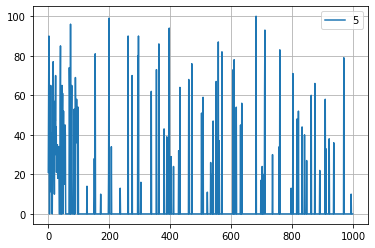

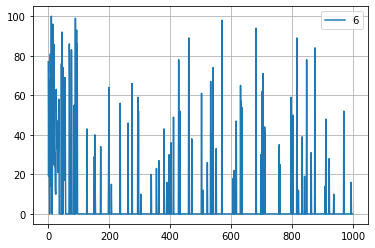

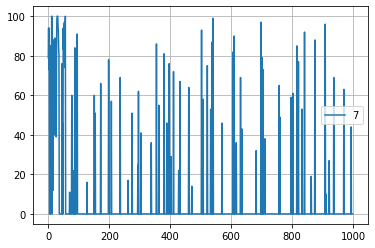

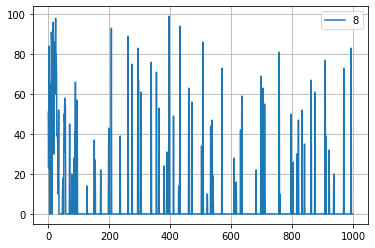

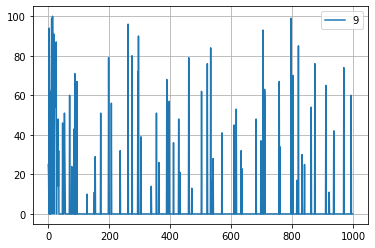

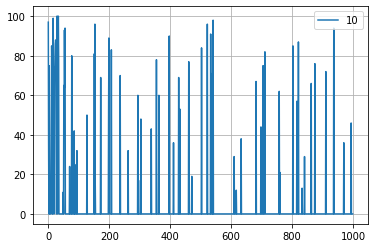

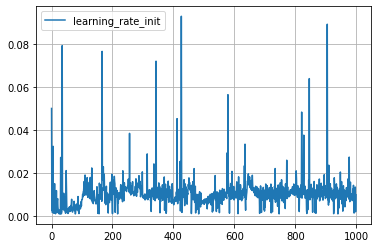

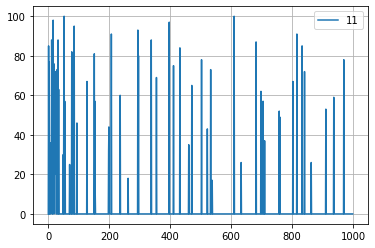

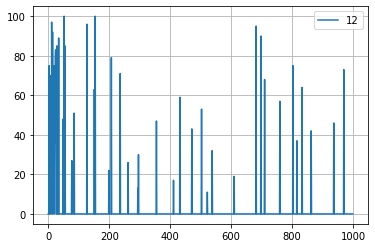

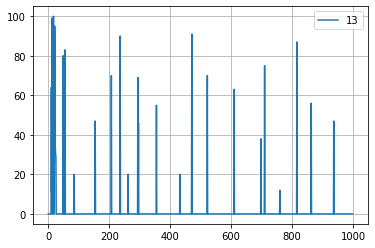

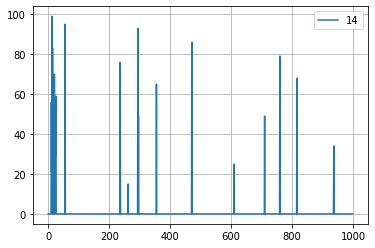

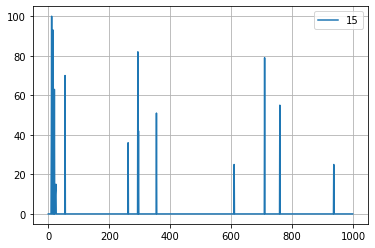

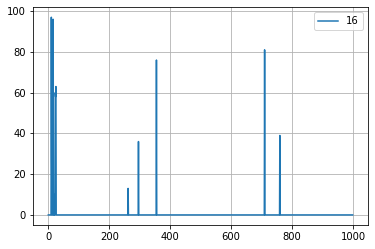

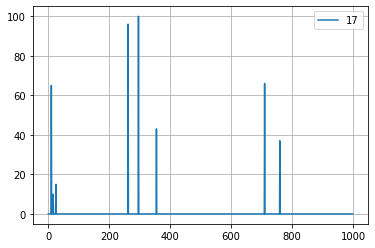

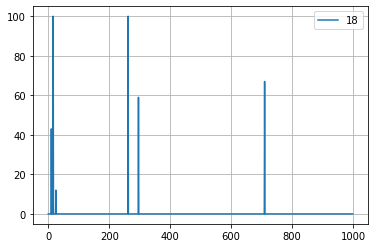

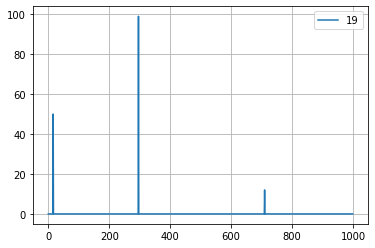

In [ ]:
trial_keys = []
for trial in study.trials:
    for key in trial.params.keys():
        if key not in trial_keys:
            trial_keys.append(key)

for key in trial_keys:
    values = []
    for trial in study.trials:
        if key in trial.params.keys():
            values.append(trial.params[key])
        else:
            values.append(0)
    plt.plot(values, label=key)
    plt.grid()
    plt.legend()
    plt.show()

In [ ]:
layers = []
n_layers = study.best_params['n_layers']
learning_rate_init = study.best_params['learning_rate_init']
for i in range(n_layers):
    layers.append(study.best_params[str(i)])
best_model = make_pipeline(
        StandardScaler(), 
        MLPRegressor(
            random_state=1,
            max_iter=2000, early_stopping=True,
            hidden_layer_sizes=tuple(layers),
            learning_rate_init=learning_rate_init,
            )
    )
best_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=True, epsilon=1e-08,
                              hidden_layer_sizes=(17, 76),
                              learning_rate='constant',
                              learning_rate_init=0.011847664163078003,
                              max_fun=15000, max_iter=2000, momentum=0.9,
                              n_iter_no_change=10, nesterovs_momentum=True,
                              power_t=0.5, random_state=1, shuffle=True,
                              solver='adam', tol=0.0001,
                              validation_fraction=0.1, verbose=False,
                              warm_start=False))],
         verbose=False)

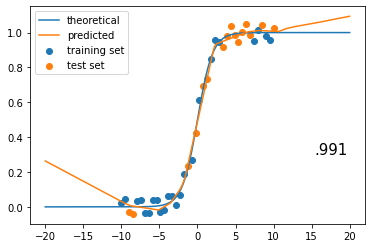

In [ ]:
y_predict = best_model.predict(x_latent.reshape(len(x_latent), 1))
score = best_model.score(X_test, y_test)
plt.scatter(X_train, y_train, label="training set")
plt.scatter(X_test, y_test, label="test set")
plt.plot(x_latent, y_latent, label="theoretical")
plt.plot(x_latent, y_predict, label="predicted")
plt.legend()
plt.text(
    x_latent.max() - 0.3, 
    y_latent.min() + 0.3,
    ("%.3f" % score).lstrip("0"),
    size=15,
    horizontalalignment="right",
    )
plt.show()